In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data set

tv_shows_df = pd.read_csv('../csv/tv_shows_data_cleaned.csv')
tv_shows_df.head()

,id,name,original_name,genre_name,number_of_seasons,number_of_episodes,first_air_date,last_air_date,in_production,popularity,...,vote_count,origin_country,original_language,overview,tagline,creator_names,production_names,production_logo_paths,production_origin_countries,poster_path
0,25,Star Wars: Droids,Star Wars: Droids,"Kids, Animation, Action & Adventure, Sci-Fi & ...",1,13,1985-09-07,1985-11-30,False,11.592,...,66,"[""CA"",""US""]",en,An animated television series that features th...,NaN,"['George Lucas', 'Ben Burtt', 'Clive A. Smith'...","['Lucasfilm Animation', 'Lucasfilm Ltd.']","['/eDWGeg5tdVNcI8aBaaJ21bEBtFa.png', '/o86Dbpb...","['US', 'US']",/b3gsZSTauRBJDJvWCbD9oVAsFe1.jpg
1,29,"Mary Hartman, Mary Hartman","Mary Hartman, Mary Hartman","Drama, Soap, Comedy",2,307,1976-01-05,1977-03-10,False,14.367,...,8,"[""US""]",en,"In the fictional town of Fernwood, Ohio, subur...",NaN,"['Gail Parent', 'Norman Lear', 'Ann Marcus', '...",['TAT Communications Company'],[None],[''],/O1bcYEBW8v7JOMNVpYOBTL6PjL.jpg
2,55,North of 60,North of 60,Drama,6,95,1992-12-03,2005-01-30,False,5.742,...,42,"[""CA""]",en,North of 60 is a mid-1990s Canadian television...,NaN,NaN,NaN,NaN,NaN,/twsoO8NCTitfW4My9wKz2p5yJou.jpg
3,65,The Job,The Job,"Drama, Comedy",2,19,2001-03-14,2002-04-24,False,6.335,...,53,"[""US""]",en,Mike McNeil is a decorated New York City detec...,NaN,"['Denis Leary', 'Peter Tolan']","['The Cloudland Company', 'Apostle', 'Touchsto...","[None, None, '/wwaKUcOENHix2jxLfFBfNkCtOEQ.png...","['US', 'US', 'US', 'US']",/iDiiIBZCjdihpBoDKzVRhb7C9B.jpg
4,70,This Hour Has 22 Minutes,This Hour Has 22 Minutes,"News, Comedy",30,386,2009-09-28,2023-02-21,True,15.032,...,46,"[""CA""]",en,This Hour Has 22 Minutes is a weekly Canadian ...,NaN,"['Mary Walsh', 'Rick Mercer']",NaN,NaN,NaN,/7sP1tv9e2wZzdOATVZxtZN3DUbi.jpg


In [4]:
tv_shows_df.columns

Index(['id', 'name', 'original_name', 'genre_name', 'number_of_seasons',
       'number_of_episodes', 'first_air_date', 'last_air_date',
       'in_production', 'popularity', 'vote_average', 'vote_count',
       'origin_country', 'original_language', 'overview', 'tagline',
       'creator_names', 'production_names', 'production_logo_paths',
       'production_origin_countries', 'poster_path'],
      dtype='object')

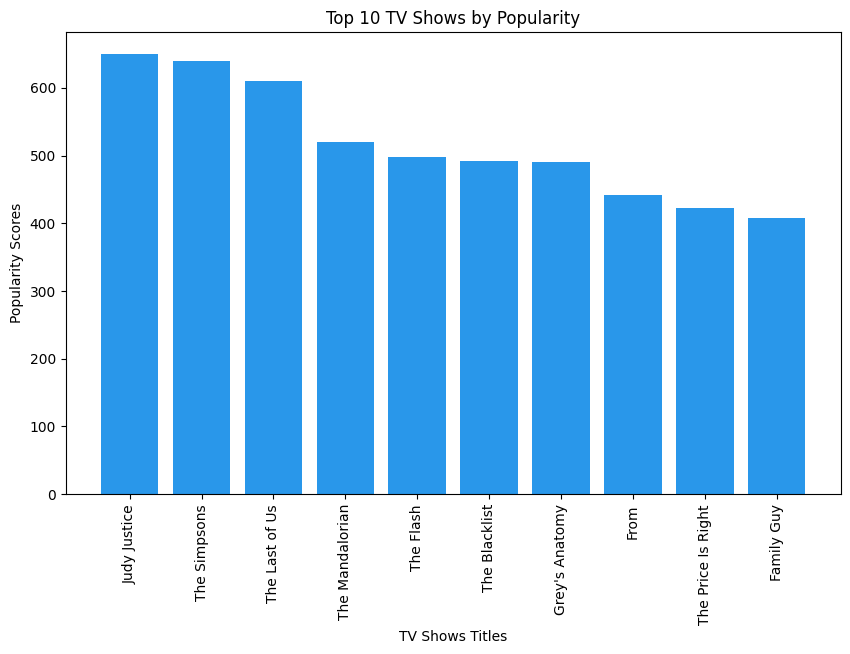

In [3]:
# Sort the DataFrame by popularity in descending order and select the top 10 movies
top_10_shows = tv_shows_df.nlargest(10, 'popularity')

# Extract the movie titles and popularity scores for the top 10 movies
show_titles = top_10_shows['name']
popularity_scores = top_10_shows['popularity']

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(show_titles, popularity_scores, color='#2997EA')
plt.xlabel('TV Shows Titles')
plt.ylabel('Popularity Scores')
plt.title('Top 10 TV Shows by Popularity')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Save the chart as an image file
plt.savefig('../graphs/tv_shows_top_10_by_popularity.png')    

# Display the chart
plt.show()

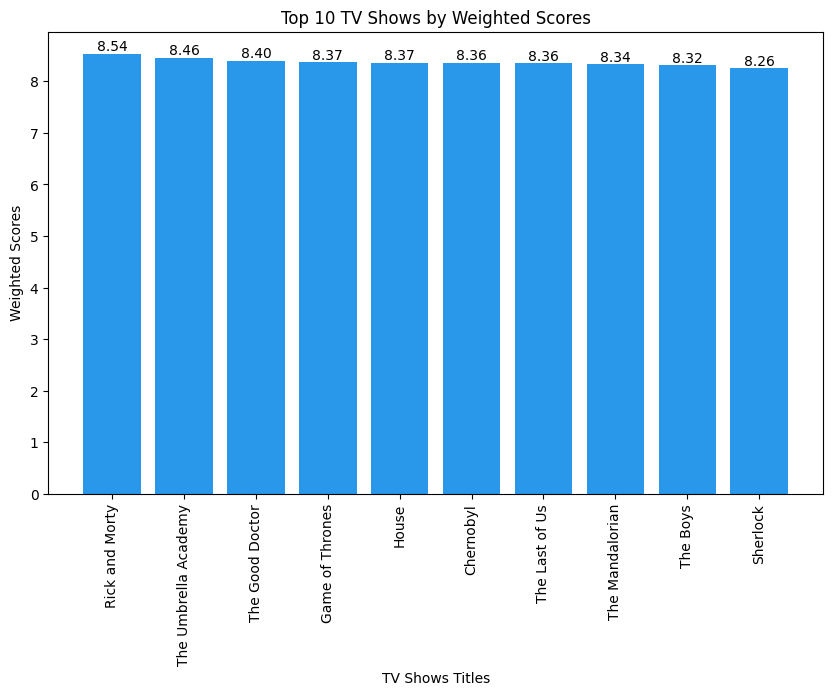

In [7]:
# Define the minimum number of votes required to be listed (threshold)
m = 1000

# Calculate the mean vote across the whole dataset
C = tv_shows_df['vote_average'].mean()

# Calculate the weighted scores for each movie
tv_shows_df['weighted_score'] = (tv_shows_df['vote_count'] / (tv_shows_df['vote_count'] + m)) * tv_shows_df['vote_average'] + (m / (tv_shows_df['vote_count'] + m)) * C

# Sort the DataFrame by weighted score in descending order
tv_shows_df = tv_shows_df.sort_values('weighted_score', ascending=False)

# Select the top 10 movies with the highest weighted scores
top_10_tv_shows = tv_shows_df.head(10)

# Extract the movie titles and weighted scores for the top 10 movies
tv_shows_titles = top_10_tv_shows['name']
weighted_scores = top_10_tv_shows['weighted_score']

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(tv_shows_titles, weighted_scores, color='#2997EA')
plt.xlabel('TV Shows Titles')
plt.ylabel('Weighted Scores')
plt.title('Top 10 TV Shows by Weighted Scores')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Convert weighted_scores to a list for proper indexing
weighted_scores_list = weighted_scores.tolist()

# Attach the weighted scores as labels on the bars
for i, bar in enumerate(bars):
    score = weighted_scores_list[i]
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{score:.2f}', ha='center', va='bottom')

# Save the chart as an image file
plt.savefig('../graphs/tv_shows_weighted_scores_chart.png')    
    
# Display the chart
plt.show()

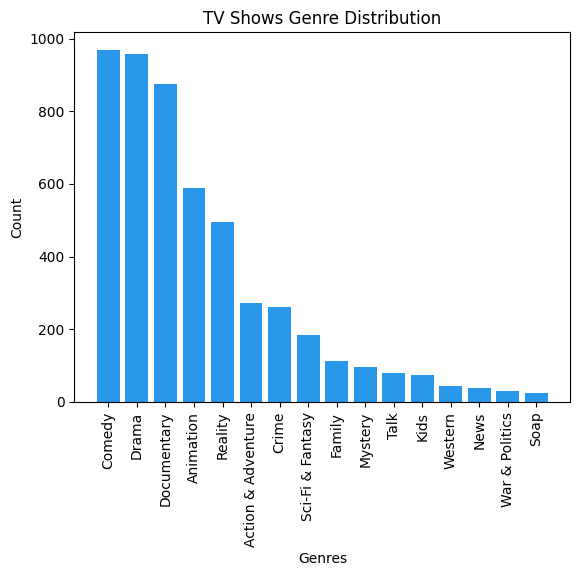

In [9]:
tv_shows_df['first_genre'] = tv_shows_df['genre_name'].str.split(',').str[0]


unique_genres = tv_shows_df['first_genre'].unique().tolist()


genre_counts = tv_shows_df['first_genre'].value_counts()

plt.bar(genre_counts.index, genre_counts.values, color='#2997EA')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('TV Shows Genre Distribution')
plt.xticks(rotation=90)

plt.savefig('../graphs/tv_shows_genre_distribution_chart.png')    

plt.show()